In [3]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 72s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train[:3] #frog, truck, truck

array([[6],
       [9],
       [9]], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
image_classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(X[index])
    plt.xlabel(image_classes[y[index]])

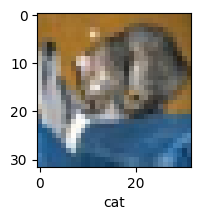

In [14]:
plot_sample(x_test,y_test,0)

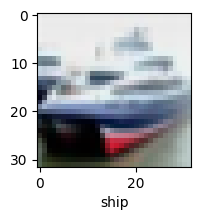

In [15]:
plot_sample(x_test,y_test,1)

In [16]:
x_train=x_train/255
x_test=x_test/255

Deep Learning(CNN-Convolutional Neural Network) Design

In [19]:
deep_learning_model=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # CNN connect to ANN(Artificial Neural Network) 
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') # We have 10 image class
])

In [22]:
deep_learning_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
deep_learning_model.fit(x_train,y_train,epochs=5)

Epoch 1/5


1563/1563 [==============================] - 25s 14ms/step - loss: 1.4472 - accuracy: 0.4851
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1041 - accuracy: 0.6154
Epoch 3/5
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9821 - accuracy: 0.6577
Epoch 4/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9014 - accuracy: 0.6856
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8360 - accuracy: 0.7107


In [24]:
deep_learning_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9239 - accuracy: 0.6863


[0.923947274684906, 0.6862999796867371]

In [25]:
y_prediction=deep_learning_model.predict(x_test)
y_prediction[:3]

313/313 [==============================] - 2s 5ms/step


array([[1.85387535e-03, 5.33640559e-04, 2.19109673e-02, 6.51171267e-01,
        6.78204140e-03, 1.43181339e-01, 8.00133646e-02, 2.87136529e-04,
        9.38800499e-02, 3.86241300e-04],
       [9.82315093e-03, 5.87351583e-02, 7.13318116e-07, 6.87284000e-07,
        1.02667222e-07, 2.93287687e-08, 1.19526391e-07, 1.01368354e-08,
        9.31175888e-01, 2.64064583e-04],
       [7.10851103e-02, 8.81930441e-02, 4.99016314e-04, 9.98463831e-04,
        5.15989028e-04, 1.29557724e-04, 1.03115366e-04, 2.64039816e-04,
        8.26680005e-01, 1.15316333e-02]], dtype=float32)

In [26]:
y_classes=[np.argmax(element) for element in y_prediction]
y_classes[:3]

[3, 8, 8]

In [27]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

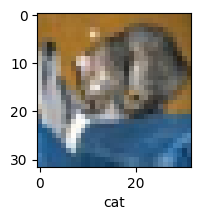

In [28]:
plot_sample(x_test,y_test,0)

In [29]:
image_classes[y_classes[0]]

'cat'

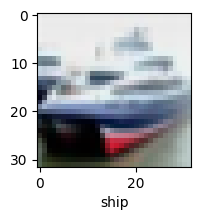

In [31]:
plot_sample(x_test,y_test,1)

In [32]:
image_classes[y_classes[1]]

'ship'